# Classifier

## Database

In [1]:
%matplotlib inline
 
import matplotlib.pyplot as plt
import numpy as np
import os
import pprint
pp = pprint.PrettyPrinter(indent=4)

imports




In [2]:
import joblib
from skimage.io import imread
from skimage.transform import resize
 
def resize_all(src, pklname, include, width=150, height=None):
    """
    load images from path, resize them and write them as arrays to a dictionary, 
    together with labels and metadata. The dictionary is written to a pickle file 
    named '{pklname}_{width}x{height}px.pkl'.
     
    Parameter
    ---------
    src: str
        path to data
    pklname: str
        path to output file
    width: int
        target width of the image in pixels
    include: set[str]
        set containing str
    """
     
    height = height if height is not None else width
     
    data = dict()
    data['description'] = 'resized ({0}x{1})metal images in rgb'.format(int(width), int(height))
    data['label'] = []
    data['filename'] = []
    data['data'] = []   
     
    pklname = f"{pklname}_{width}x{height}px.pkl"
    errorFile = open("C:\\Users\\Maria\\OneDrive\\Documents\\Projekt cult. analytics\\kaputt.txt", 'w')
    
 
    # read all images in PATH, resize and write to DESTINATION_PATH
    for subdir in os.listdir(src):
        if subdir in include:
            print(subdir)
            current_path = os.path.join(src, subdir)

            for file in os.listdir(current_path):
                try:
                    if file[-3:] in {'jpg', 'png'}:
                        #print(file)
                        im = imread(os.path.join(current_path, file))
                        im = resize(im[:,:,:3], (width, height)) #[:,:,::-1]
                        data['label'].append(subdir)
                        data['filename'].append(file)
                        data['data'].append(im)
                except Exception as e:
                    errorFile.write(str(subdir) +  "\\" + str(file) + "\n")

        joblib.dump(data, pklname)
    


bjkbjbk

TODO: gifs in jpg umwandeln 

In [3]:
# modify to fit your system
data_path = 'C:\\Users\\Maria\\OneDrive\\Documents\\Projekt cult. analytics\\Genres'
os.listdir(data_path)

['16 Returned',
 'Acoustic',
 'Alternative',
 'Alternative Metal',
 'Alternative Rock',
 'Ambient',
 'Ambient Drone',
 'Ambient Folk',
 'AOR',
 'Atmospheric',
 'Atmospheric Black Metal',
 'Atmospheric Death Metal',
 'Atmospheric Deathcore',
 'Atmospheric Doom Metal',
 'Atmospheric Folk',
 'Atmospheric Industrial',
 'Atmospheric Metal',
 'Atmospheric Pagan Metal',
 'Atmospheric Progressive Black Metal',
 'Atmospheric Progressive Metal',
 'Atmospheric Sludge',
 'Atmospheric Sludge Metal',
 'Avant-garde',
 'Avant-garde Black',
 'Avant-garde Black Metal',
 'Avant-garde Death',
 'Avant-garde Death Metal',
 'Avant-garde Doom Metal',
 'Avant-garde Extreme',
 'Avant-garde Gothic',
 'Avant-garde Grindcore',
 'Avant-garde Industrial Death Metal',
 'Avant-garde Metal',
 'Avant-garde Progressive',
 'Avant-garde Progressive Metal',
 'Avant-garde Rock',
 'Avant-garde Stoner',
 'Avant-garde Thrash Metal',
 "Black 'n' Roll",
 'Black Metal',
 'Black Metal influences',
 'Black Metal with Doom influences

modify

In [6]:
base_name = 'metal_logos'
width = 80
 
include = {'Atmospheric Black Metal', 'Ambient', 'Black Metal','Brutal Death Metal', 'Death Metal',
            'Deathcore', 'Doom Metal', 'Folk', 'Groove Metal', 'Gothic', 'Grindcore', 'Hard Rock', 'Hardcore Punk',
            'Heavy Metal', 'Metalcore', 'Power Metal', 'Rock', 'Sludge', 'Trash', 'Speed Metal', 'Stoner Metal'}
 
resize_all(src=data_path, pklname=base_name, width=width, include=include)

Ambient
Atmospheric Black Metal


c:\Users\Maria\AppData\Local\Programs\Python\Python39\lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Black Metal


UnicodeEncodeError: 'charmap' codec can't encode character '\u014d' in position 16: character maps to <undefined>

build database

In [33]:
from collections import Counter
 
data = joblib.load(f'{base_name}_{width}x{width}px.pkl')
 
print('number of samples: ', len(data['data']))
print('keys: ', list(data.keys()))
print('description: ', data['description'])
print('image shape: ', data['data'][0].shape)
print('labels:', np.unique(data['label']))
 
Counter(data['label'])

number of samples:  517
keys:  ['description', 'label', 'filename', 'data']
description:  resized (80x80)metal images in rgb
image shape:  (80, 80, 3)
labels: ['Atmospheric Black Metal' 'Metalcore']


Counter({'Atmospheric Black Metal': 153, 'Metalcore': 364})

bla


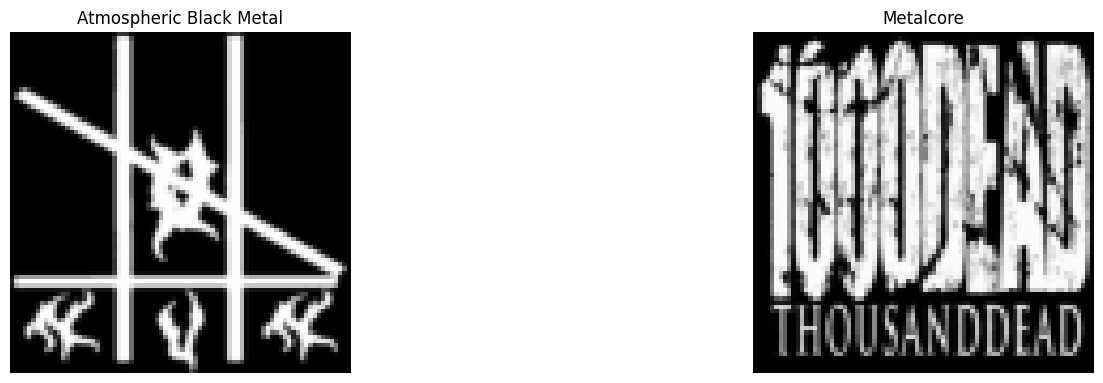

In [34]:
# use np.unique to get all unique values in the list of labels
labels = np.unique(data['label'])
 
# set up the matplotlib figure and axes, based on the number of labels
fig, axes = plt.subplots(1, len(labels))
fig.set_size_inches(15,4)
fig.tight_layout()
 
# make a plot for every label (equipment) type. The index method returns the 
# index of the first item corresponding to its search string, label in this case
for ax, label in zip(axes, labels):
    idx = data['label'].index(label)
     
    ax.imshow(data['data'][idx])
    ax.axis('off')
    ax.set_title(label)

In [35]:
X = np.array(data['data'])
y = np.array(data['label'])

blub

In [36]:
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    shuffle=True,
    random_state=42,
)

blobb

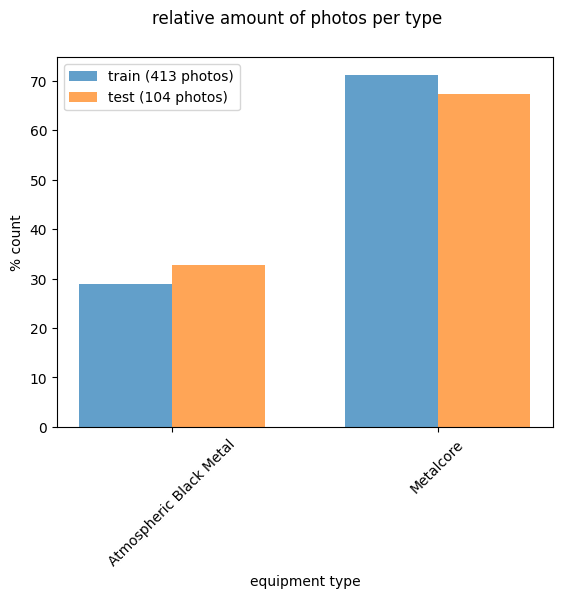

In [37]:
def plot_bar(y, loc='left', relative=True):
    width = 0.35
    if loc == 'left':
        n = -0.5
    elif loc == 'right':
        n = 0.5
     
    # calculate counts per type and sort, to ensure their order
    unique, counts = np.unique(y, return_counts=True)
    sorted_index = np.argsort(unique)
    unique = unique[sorted_index]
     
    if relative:
        # plot as a percentage
        counts = 100*counts[sorted_index]/len(y)
        ylabel_text = '% count'
    else:
        # plot counts
        counts = counts[sorted_index]
        ylabel_text = 'count'
         
    xtemp = np.arange(len(unique))
     
    plt.bar(xtemp + n*width, counts, align='center', alpha=.7, width=width)
    plt.xticks(xtemp, unique, rotation=45)
    plt.xlabel('equipment type')
    plt.ylabel(ylabel_text)
 
plt.suptitle('relative amount of photos per type')
plot_bar(y_train, loc='left')
plot_bar(y_test, loc='right')
plt.legend([
    'train ({0} photos)'.format(len(y_train)), 
    'test ({0} photos)'.format(len(y_test))
])

## Processing

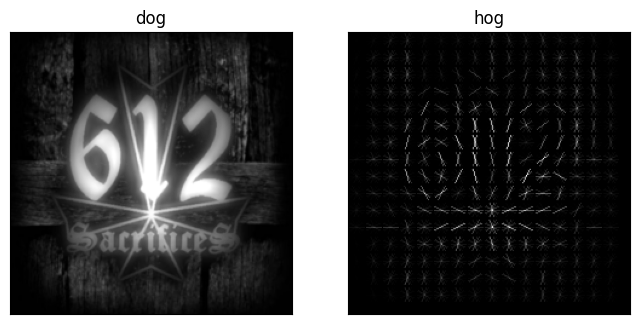

In [39]:
from skimage.feature import hog
from skimage.io import imread
from skimage.transform import rescale
 
dog = imread(data_path+"\\Atmospheric Black Metal\\612Sacrifices_3540421158_logo.jpg", as_gray=True)
# https://en.wikipedia.org/wiki/German_Shepherd#/media/File:Kim_at_14_weeks.jpg
 
# scale down the image to one third
dog = rescale(dog, 1/3, mode='reflect')
# calculate the hog and return a visual representation.
dog_hog, dog_hog_img = hog(
    dog, pixels_per_cell=(14,14), 
    cells_per_block=(2, 2), 
    orientations=9, 
    visualize=True, 
    block_norm='L2-Hys')
 
fig, ax = plt.subplots(1,2)
fig.set_size_inches(8,6)
# remove ticks and their labels
[a.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False) 
    for a in ax]
 
ax[0].imshow(dog, cmap='gray')
ax[0].set_title('dog')
ax[1].imshow(dog_hog_img, cmap='gray')
ax[1].set_title('hog')
plt.show()

jjhj

In [40]:
print('number of pixels: ', dog.shape[0] * dog.shape[1])
print('number of hog features: ', dog_hog.shape[0])

number of pixels:  54289
number of hog features:  8100


kkkkk


## Transformers


In [41]:
from sklearn.base import BaseEstimator, TransformerMixin
from skimage.color import rgb2gray
 
class RGB2GrayTransformer(BaseEstimator, TransformerMixin):
    """
    Convert an array of RGB images to grayscale
    """
 
    def __init__(self):
        pass
 
    def fit(self, X, y=None):
        """returns itself"""
        return self
 
    def transform(self, X, y=None):
        """perform the transformation and return an array"""
        return np.array([rgb2gray(img) for img in X])
     
 
class HogTransformer(BaseEstimator, TransformerMixin):
    """
    Expects an array of 2d arrays (1 channel images)
    Calculates hog features for each img
    """
 
    def __init__(self, y=None, orientations=9,
                 pixels_per_cell=(8, 8),
                 cells_per_block=(3, 3), block_norm='L2-Hys'):
        self.y = y
        self.orientations = orientations
        self.pixels_per_cell = pixels_per_cell
        self.cells_per_block = cells_per_block
        self.block_norm = block_norm
 
    def fit(self, X, y=None):
        return self
 
    def transform(self, X, y=None):
 
        def local_hog(X):
            return hog(X,
                       orientations=self.orientations,
                       pixels_per_cell=self.pixels_per_cell,
                       cells_per_block=self.cells_per_block,
                       block_norm=self.block_norm)
 
        try: # parallel
            return np.array([local_hog(img) for img in X])
        except:
            return np.array([local_hog(img) for img in X])

,,,,,,,ll

In [42]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler, Normalizer
import skimage
 
# create an instance of each transformer
grayify = RGB2GrayTransformer()
hogify = HogTransformer(
    pixels_per_cell=(14, 14), 
    cells_per_block=(2,2), 
    orientations=9, 
    block_norm='L2-Hys'
)
scalify = StandardScaler()
 
# call fit_transform on each transform converting X_train step by step
X_train_gray = grayify.fit_transform(X_train)
X_train_hog = hogify.fit_transform(X_train_gray)
X_train_prepared = scalify.fit_transform(X_train_hog)
 
print(X_train_prepared.shape)

(413, 576)


kommi

## Training

In [43]:
sgd_clf = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3)
sgd_clf.fit(X_train_prepared, y_train)

SGDClassifier(random_state=42)

njnkjkn

## Testing


In [44]:
X_test_gray = grayify.transform(X_test)
X_test_hog = hogify.transform(X_test_gray)
X_test_prepared = scalify.transform(X_test_hog)

In [45]:
y_pred = sgd_clf.predict(X_test_prepared)
print(np.array(y_pred == y_test)[:25])
print('')
print('Percentage correct: ', 100*np.sum(y_pred == y_test)/len(y_test))

[ True  True  True  True  True False  True  True  True  True  True False
 False False False  True False False  True False  True  True  True  True
 False]

Percentage correct:  55.76923076923077
